<a href="https://colab.research.google.com/github/vybraan/Maternal-Infant-Health-Analysis/blob/master/ICT4Dev_DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maternal and Infant Health Analysis**

This project focuses on exploring and analysing dataset related to maternal and child health. The dataset include information on pregnancies, birth outcomes, child health factors. My aim is to gain insight into the factors that influence pregnancy outcomes, identify trends and contribute to the understanding of health patterns.

## Data sets included:
1. Birth outcomes dataset: This dataset includes information on the outcomes of pregnancies, such as types of birth (single or multiple[ it means twins or not]), neonatal health and maternal health status.

The datasets presented here can be found in one of the government or [National Statistics Institute](https://www.ine.gov.mz/pt/web/guest/outras-plataformas)  archives, specifically on [COMSA](https://comsamozambique.org/baixar-documento).


I will, however, add the datasets to the [github](https://github.com/vybraan/Maternal-Infant-Health-Analysis) repository.

**Import of useful libraries**

---



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


Adding Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Naviating to my files

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [92]:
cpragnacy_outcome = pd.read_csv("Comsa_pregnancy_outcome_20230801.csv")

In [93]:
cpragnacy_outcome.shape

(66886, 15)

In [94]:
cpragnacy_outcome.head(5)

,ev_uniq,provincia,agegroup,po14,po17,po18,po19,po20,po21,po22,residence,wa_code,pofbsex,pofbwgt,pofreg
0,72274,Tete,25-29,"Yes, seen",Health facility,9,No,NaN,NaN,Live birth,Rural,AT05060,Female,3000.0,Yes
1,101869,Tete,25-29,"Yes, seen",Health facility,9,No,NaN,NaN,Live birth,Rural,AT05250,Male,3600.0,Yes
2,61361,Maputo Provincia,15-19,"Yes, seen",Health facility,9,No,NaN,NaN,Live birth,Urban,AT10070,Male,3800.0,No
3,82435,Tete,20-24,"Yes, seen",Health facility,9,No,NaN,NaN,Live birth,Rural,AT05059,Male,3000.0,Yes
4,66221,Tete,20-24,"Yes, seen",Health facility,9,No,NaN,NaN,Live birth,Rural,AT05076,Male,3000.0,Yes


Assessment and cleaning, renaming necessary variables

In [95]:
cpragnacy_outcome.rename(columns={'ev_uniq': 'id', 'po14': 'health_card', 'po17':'birth_place','po18':'time_of_pragnancy','po19':'multiple_birth','po20':'born_alive','po21':'born_dead', 'po22':'bornDead'}, inplace=True)

cpragnacy_outcome['bornDead'] = cpragnacy_outcome['bornDead'].map({'Live birth': 1, 'stillbirth': 0})

cpragnacy_outcome.loc[cpragnacy_outcome['health_card'].str.contains('Yes'), 'health_card'] = 'Yes'
cpragnacy_outcome.loc[cpragnacy_outcome['health_card'].str.contains('No'), 'health_card'] = 'No'
cpragnacy_outcome['agegroup'] = cpragnacy_outcome['agegroup'].str.replace('u', '')



In [96]:
cpragnacy_outcome.head(5)

,id,provincia,agegroup,health_card,birth_place,time_of_pragnancy,multiple_birth,born_alive,born_dead,bornDead,residence,wa_code,pofbsex,pofbwgt,pofreg
0,72274,Tete,25-29,Yes,Health facility,9,No,NaN,NaN,1.0,Rural,AT05060,Female,3000.0,Yes
1,101869,Tete,25-29,Yes,Health facility,9,No,NaN,NaN,1.0,Rural,AT05250,Male,3600.0,Yes
2,61361,Maputo Provincia,15-19,Yes,Health facility,9,No,NaN,NaN,1.0,Urban,AT10070,Male,3800.0,No
3,82435,Tete,20-24,Yes,Health facility,9,No,NaN,NaN,1.0,Rural,AT05059,Male,3000.0,Yes
4,66221,Tete,20-24,Yes,Health facility,9,No,NaN,NaN,1.0,Rural,AT05076,Male,3000.0,Yes


For the scope of my analysis, I will drop some variables that may not be relevant or that may not provide valuable information for my analysis. Here are some variables that I am excluding from the analysis on the basis of their limited potential usefulness, some of them are duplicates, so...

In [97]:
columns_to_drop = ['born_alive', 'born_dead','wa_code'] #'event_uniqueID',
cpragnacy_outcome.drop(columns=columns_to_drop, inplace=True)
cpragnacy_outcome.head(5)


,id,provincia,agegroup,health_card,birth_place,time_of_pragnancy,multiple_birth,bornDead,residence,pofbsex,pofbwgt,pofreg
0,72274,Tete,25-29,Yes,Health facility,9,No,1.0,Rural,Female,3000.0,Yes
1,101869,Tete,25-29,Yes,Health facility,9,No,1.0,Rural,Male,3600.0,Yes
2,61361,Maputo Provincia,15-19,Yes,Health facility,9,No,1.0,Urban,Male,3800.0,No
3,82435,Tete,20-24,Yes,Health facility,9,No,1.0,Rural,Male,3000.0,Yes
4,66221,Tete,20-24,Yes,Health facility,9,No,1.0,Rural,Male,3000.0,Yes


In [98]:
cpragnacy_outcome.dtypes

id                     int64
provincia             object
agegroup              object
health_card           object
birth_place           object
time_of_pragnancy      int64
multiple_birth        object
bornDead             float64
residence             object
pofbsex               object
pofbwgt              float64
pofreg                object
dtype: object

In [99]:
print(cpragnacy_outcome.isnull().sum().sum())

13710


In [100]:
missing_rows = cpragnacy_outcome[cpragnacy_outcome.isnull().any(axis=1)]
print(missing_rows)

           id  provincia agegroup health_card      birth_place  \
12      58778     Sofala    20-24         Yes  Health facility   
42      92547       Tete    20-24         Yes  Health facility   
48      75152       Tete    15-19         Yes  Health facility   
54     129519  Inhambane    30-34         Yes             Home   
67      98143       Tete    25-29         Yes  Health facility   
...       ...        ...      ...         ...              ...   
66881   31449     Manica    25-29         Yes             Home   
66882  115630   Zambezia    30-34         Yes             Home   
66883  125672       Tete    25-29         Yes  Health facility   
66884   34873     Sofala    20-24         Yes  Health facility   
66885   33900     Manica    25-29         Yes             Home   

       time_of_pragnancy multiple_birth  bornDead residence pofbsex  pofbwgt  \
12                     9             No       NaN     Urban     NaN      NaN   
42                     9             No       N

In [101]:
cpragnacy_outcome = cpragnacy_outcome.dropna()
cpragnacy_outcome.tail(5)

,id,provincia,agegroup,health_card,birth_place,time_of_pragnancy,multiple_birth,bornDead,residence,pofbsex,pofbwgt,pofreg
66685,5995,Cabo Delgado,30-34,Yes,Health facility,10,No,1.0,Rural,Male,700.0,Yes
66732,119934,Cabo Delgado,25-29,Yes,Home,9,No,1.0,Urban,Male,9999.0,Yes
66733,119934,Cabo Delgado,25-29,Yes,Home,9,No,1.0,Urban,Male,9999.0,Yes
66734,119934,Cabo Delgado,25-29,Yes,Home,9,No,1.0,Urban,Male,9999.0,Yes
66828,71132,Maputo Provincia,25-29,Yes,Health facility,9,No,1.0,Urban,Female,3600.0,Yes


Rows and colums of the dataset

In [102]:

print("Rows: {}".format(cpragnacy_outcome.shape[0]))
print("Columns: {}".format(cpragnacy_outcome.shape[1]))


Rows: 61517
Columns: 12


In [103]:
duplicates = cpragnacy_outcome.duplicated()
print(duplicates.any())

True


In [104]:
print(cpragnacy_outcome[duplicates])

           id         provincia agegroup health_card      birth_place  \
65680   70864            Sofala    15-19          No  Health facility   
65684  114065              Gaza    25-29         Yes  Health facility   
65743    6148      Cabo Delgado    20-24         Yes             Home   
66297   98364            Manica    20-24         Yes  Health facility   
66362   94190              Tete    15-19         Yes             Home   
66382  111963          Zambezia    35-39         Yes             Home   
66383  111963          Zambezia    35-39         Yes             Home   
66489   67859  Maputo Provincia    20-24         Yes  Health facility   
66522  110545      Cabo Delgado    35-39         Yes  Health facility   
66554   63114      Cabo Delgado    20-24         Yes             Home   
66638   28793           Nampula    15-19         Yes  Health facility   
66639   28793           Nampula    15-19         Yes  Health facility   
66640   28793           Nampula    15-19         Ye

In [105]:
# Drop duplicates
cpragnacy_outcome = cpragnacy_outcome.drop_duplicates()

#cpragnacy_outcome.shape
print("Rows: {}".format(cpragnacy_outcome.shape[0]))
print("Columns: {}".format(cpragnacy_outcome.shape[1]))

cpragnacy_outcome = cpragnacy_outcome.sort_values(by=['id'])

# Calculate the mean of 'pofbwgt'
mean_pofbwgt = cpragnacy_outcome['pofbwgt'].mean()

# Replacing values greater than 7 with the mean in the 'pofbwg' column.
# This decision is based on the rarity of extremely high birth weights.
# While it's possible for babies to weigh 7kg at birth, it's quite uncommon.
# Birth weights of 9kg or 10kg are exceptionally rare and historically limited.
# In fact, such weights were recorded primarily around the 1950s but remain extremely unusual.
# By replacing these outliers with the mean, we aim to maintain a more representative dataset.

cpragnacy_outcome.loc[cpragnacy_outcome['pofbwgt'] > 8000, 'pofbwgt'] = mean_pofbwgt

# Same with time of pragnancy
cpragnacy_outcome.loc[cpragnacy_outcome['time_of_pragnancy'] > 11, 'time_of_pragnancy'] = 9



cpragnacy_outcome.tail()

Rows: 61500
Columns: 12


,id,provincia,agegroup,health_card,birth_place,time_of_pragnancy,multiple_birth,bornDead,residence,pofbsex,pofbwgt,pofreg
50908,136942,Inhambane,30-34,Yes,Health facility,9,No,1.0,Rural,Female,3100.0,No
22541,136944,Inhambane,15-19,Yes,Health facility,9,No,1.0,Urban,Female,4500.0,Yes
58428,136945,Inhambane,20-24,Yes,Health facility,9,No,1.0,Urban,Female,3250.0,Yes
27070,136947,Inhambane,15-19,Yes,Health facility,9,No,1.0,Urban,Female,3100.0,Yes
36853,136948,Inhambane,15-19,Yes,Health facility,9,No,1.0,Urban,Male,3400.0,Yes


Completeness

In [106]:
print("{0:.1f}%".format((cpragnacy_outcome.count().sum()/(cpragnacy_outcome.isnull().sum().sum()+cpragnacy_outcome.count().sum())) * 100))

100.0%


In [107]:
cpragnacy_outcome.describe()

,id,time_of_pragnancy,bornDead,pofbwgt
count,61500.000000,61500.000000,61500.0,61500.000000
mean,70079.395870,8.993008,1.0,2987.479977
std,36620.906754,0.346812,0.0,877.399057
min,12.000000,6.000000,1.0,500.000000
25%,39180.500000,9.000000,1.0,2600.000000
50%,71678.000000,9.000000,1.0,3000.000000
75%,102788.250000,9.000000,1.0,3500.000000
max,136948.000000,10.000000,1.0,7000.000000


# We'll Explore Distribution of Childbirth Events by Province

Let's explore some categorical variables 'province' to gain initial insights.

Zambezia            12132
Tete                 9519
Manica               7654
Cabo Delgado         7480
Nampula              5501
Niassa               4938
Sofala               3541
Inhambane            3396
Gaza                 2748
Maputo Provincia     2507
Maputo Cidade        2084
Name: provincia, dtype: int64


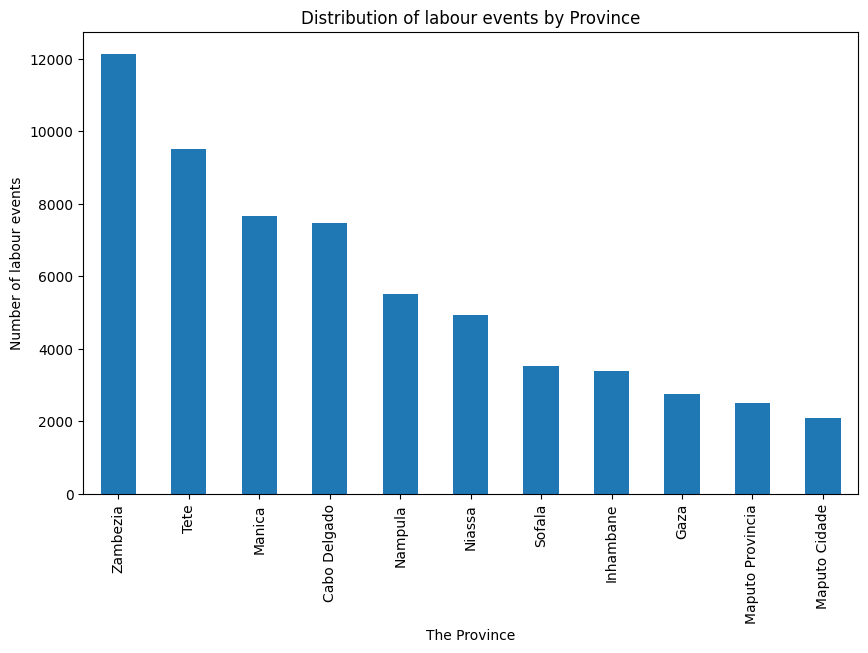

In [108]:
# Counting the categories in 'province'
province_counts = cpragnacy_outcome['provincia'].value_counts()
print(province_counts)

# Bar chart for 'province'
plt.figure(figsize=(10, 6))
province_counts.plot(kind='bar')
plt.title('Distribution of labour events by Province')
plt.xlabel('The Province')
plt.ylabel('Number of labour events')
plt.show()

We observe that the Zambeze province recorded the highest number of labor-related cases

# Analysing Relationships

Let's explore possible relationships between variables. I'm going to investigate how birth weight varies with the mother's age ('agegroup').

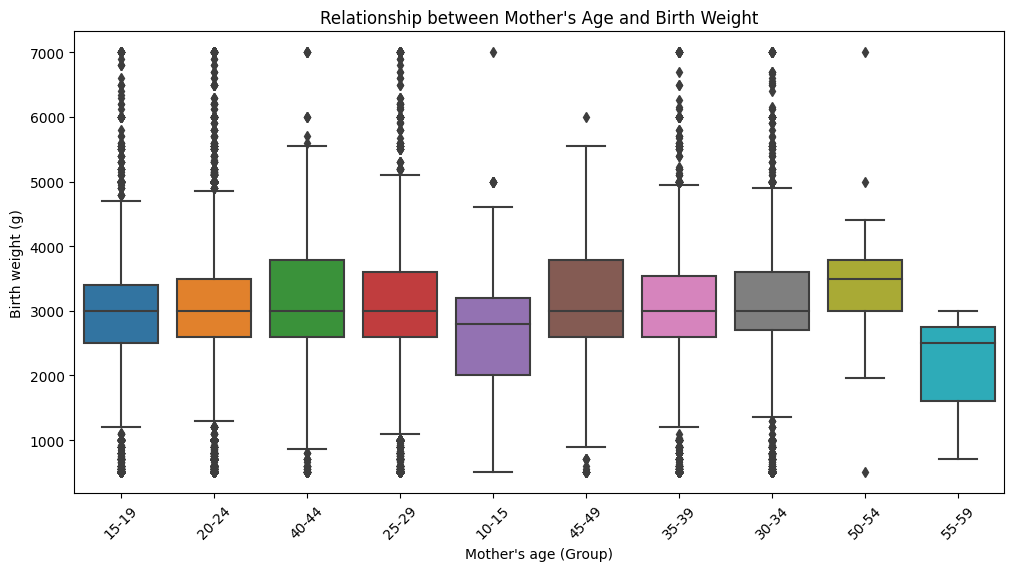

In [109]:
# Boxplot of 'pofbwgt' by 'agegroup'
plt.figure(figsize=(12, 6))
sns.boxplot(x='agegroup', y='pofbwgt', data=cpragnacy_outcome)
plt.title('Relationship between Mother\'s Age and Birth Weight')
plt.xlabel('Mother\'s age (Group)')
plt.ylabel('Birth weight (g)')
plt.xticks(rotation=45)
plt.show()

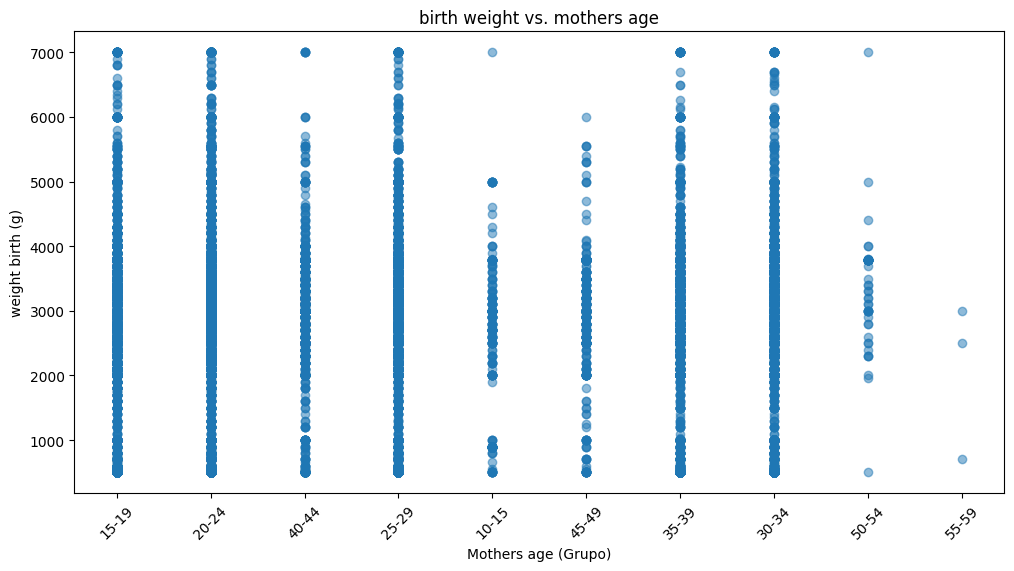

In [110]:
plt.figure(figsize=(12, 6))
plt.scatter(cpragnacy_outcome['agegroup'], cpragnacy_outcome['pofbwgt'], alpha=0.5)
plt.title('birth weight vs. mothers age')
plt.xlabel('Mothers age (Grupo)')
plt.ylabel('weight birth (g)')
plt.xticks(rotation=45)
plt.show()

With the analysis of the two plots, it becomes evident that younger and older women tend to have infants with lower birth weights. Conversely, women in their prime reproductive years typically give birth to infants with higher birth weights, which is indicative of overall better maternal and infant health.

# Distribution of Births by Location
Let's explore the distribution of births based on birth_place.

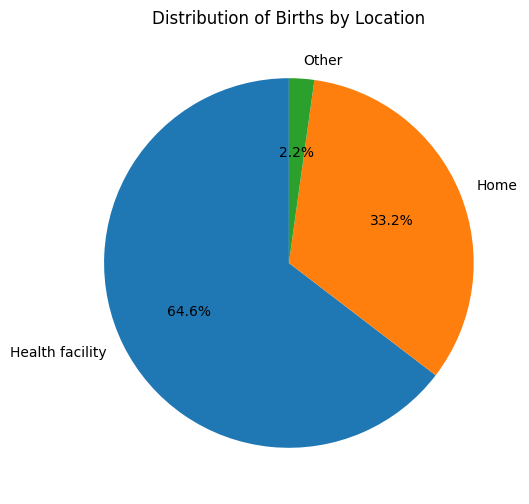

In [111]:
birthplace_counts = cpragnacy_outcome['birth_place'].value_counts()

plt.figure(figsize=(8, 6))
birthplace_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Births by Location')
plt.ylabel('')
plt.show()

In the analysis, we find that approximately 33.2% of births took place at home, with 2.2% occurring in other non-standard locations, possibly en route to a hospital. The majority, approximately 64%, took place within hospital facilities

# Influence of the Health Card on a Successful Birth
In this analysis, we will investigate whether the presence of a health card (health_card) is associated with a higher number of successful births. The health card usually indicates that the mother received adequate antenatal care. We want to understand whether this has a positive influence on birth outcomes.

<ipython-input-112-c7408577dca4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cpragnacy_outcome, x='health_card', y='bornDead', ci=None)


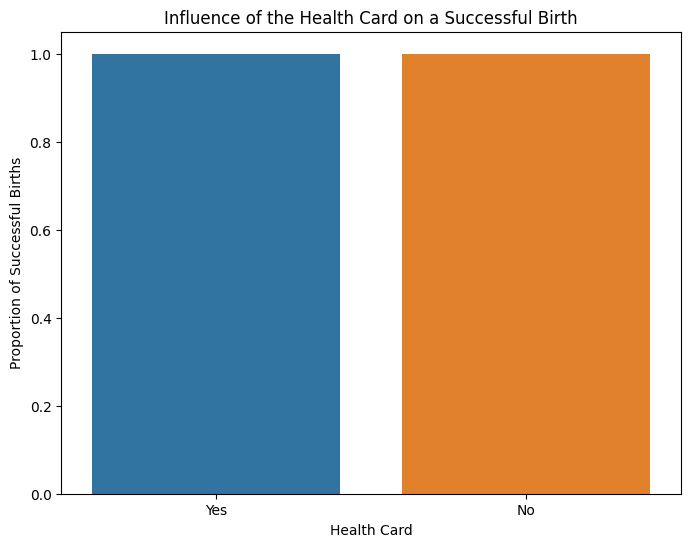

In [112]:
plt.figure(figsize=(8, 6))
sns.barplot(data=cpragnacy_outcome, x='health_card', y='bornDead', ci=None)
plt.title('Influence of the Health Card on a Successful Birth')
plt.xlabel('Health Card')
plt.ylabel('Proportion of Successful Births')
plt.show()

In this context, whether individuals possessed a health card or underwent prenatal care, it's noteworthy that 100% of pregnancies resulted in live births

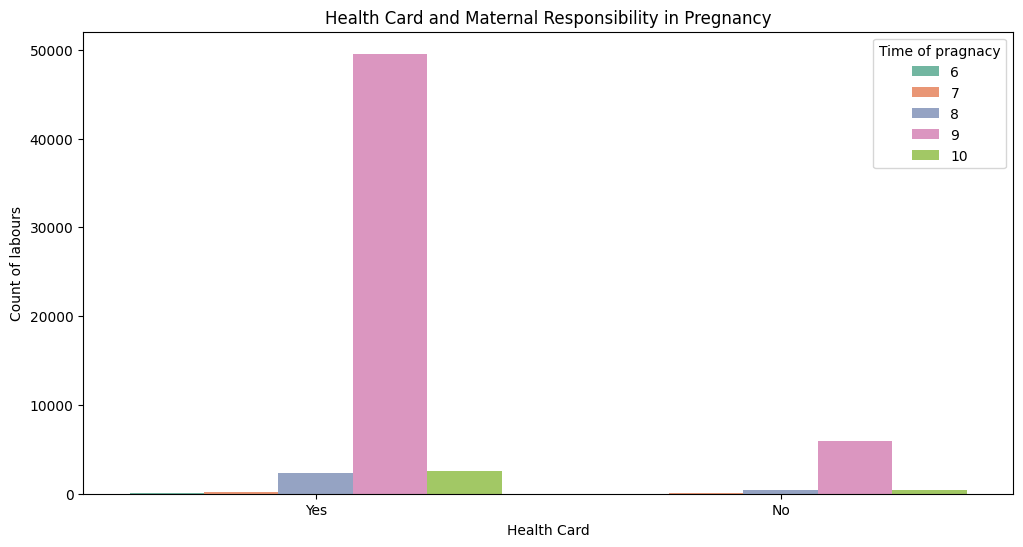

In [113]:
# Vamos criar um gráfico de barras empilhadas para comparar a presença do cartão de saúde com o acompanhamento pré-natal e os resultados de nascimento
plt.figure(figsize=(12, 6))
sns.countplot(data=cpragnacy_outcome, x='health_card', hue='time_of_pragnancy', palette='Set2')
plt.title('Health Card and Maternal Responsibility in Pregnancy')
plt.xlabel('Health Card')
plt.ylabel('Count of labours')
plt.legend(title='Time of pragnacy')
plt.show()

The majority of pregnancies last for approximately 9 months, and it's notable that a smaller proportion of women did not undergo prenatal care

# Mothers' age and multiple births

In this analysis, we will explore the relationship between the age of mothers (maternal age) and the occurrence of multiple births. We want to determine whether certain maternal age groups are more or less likely to have multiple births.

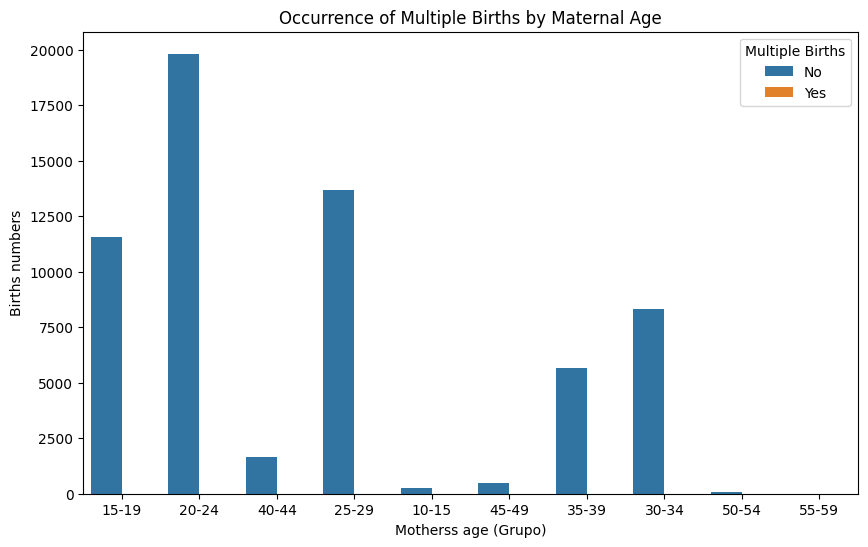

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cpragnacy_outcome, x='agegroup', hue='multiple_birth')
plt.title('Occurrence of Multiple Births by Maternal Age')
plt.xlabel('Motherss age (Grupo)')
plt.ylabel('Births numbers')
plt.legend(title='Multiple Births', labels=['No', 'Yes'])
plt.show()

From our analysis, it becomes evident that the age of the mother does not appear to significantly influence the likelihood of giving birth to twins

# Occurrence of Multiple Births and Outcomes (Live or Dead)

In this analysis, we will investigate the occurrence of multiple births and determine whether the majority of them were born alive or dead.

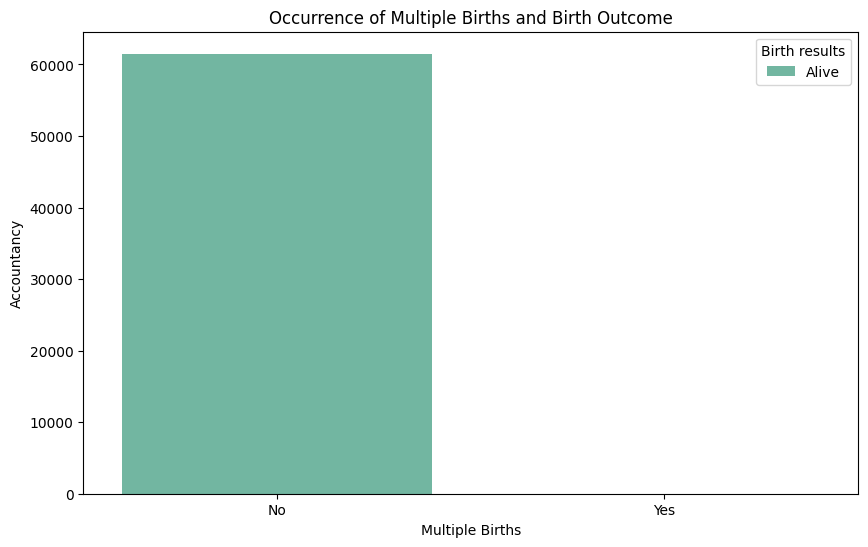

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cpragnacy_outcome, x='multiple_birth', hue='bornDead', palette='Set2')
plt.title('Occurrence of Multiple Births and Birth Outcome')
plt.xlabel('Multiple Births')
plt.ylabel('Accountancy')
plt.legend(title='Birth results', labels=['Alive', 'Dead'])
plt.show()

In this context, the occurrence of multiple births does not seem to significantly influence whether the birth is classified as alive or stillbirth. It's important to note that this observation may be influenced by the limited amount of data available on this specific scenario.

# **Regression - Birth Weight Prediction:**

**Data preparation:**


In [116]:
#id	provincia	agegroup	health_card	birth_place	time_of_pragnancy	multiple_birth	bornDead	residence	pofbsex	pofbwgt	pofreg

# Wont use it now, maybe when classificating if the kid will be born dead or alive
cpragnacy_outcome['birth_place'] = cpragnacy_outcome['birth_place'].map({'Health Facility': 1, 'Home': 2, 'Other': 3})



cpragnacy_outcome['multiple_birth'] = cpragnacy_outcome['multiple_birth'].map({'Yes': 1, 'No': 0})
cpragnacy_outcome['health_card'] = cpragnacy_outcome['health_card'].map({'Yes': 1, 'No': 0})

#changing the agegroup mean
cpragnacy_outcome['agegroup'] = cpragnacy_outcome['agegroup'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)


features = ['agegroup', 'health_card', 'time_of_pragnancy', 'multiple_birth']
X = cpragnacy_outcome[features]
y = cpragnacy_outcome['pofbwgt']

# Data division:

Now dividing the data into training and test sets. I'll use 80 per cent of the data for training and 20 per cent for testing

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regression Model:

I'll use a Multiple Linear Regression model to predict the birth weight  child wen born

In [118]:
# Crie e treine o modelo de Regressão Linear Múltipla
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation:

Evaluating the model's performance using regression metrics, such as Mean Squared Error (MSE) or Coefficient of Determination (R^2), on the test set:

In [119]:
#  no conjunto de teste
y_pred = model.predict(X_test)


# Regression Model Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Metrics:")
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R^2): {r2:.2f}')



Regression Model Metrics:
Erro Quadrático Médio (MSE): 755553.80
Coeficiente de Determinação (R^2): 0.00


NOt satisfied by mse, testing with others

In [120]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_pred = poly_model.predict(poly_features.transform(X_test))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Metrics:")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')


Polynomial Regression Metrics:
Mean Squared Error (MSE): 754776.05
Coefficient of Determination (R^2): 0.01


In [121]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Metrics:")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')


Decision Tree Regression Metrics:
Mean Squared Error (MSE): 754314.65
Coefficient of Determination (R^2): 0.01


In [122]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Metrics:")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')


Random Forest Regression Metrics:
Mean Squared Error (MSE): 754303.59
Coefficient of Determination (R^2): 0.01


# ***Conclusion***
The regression models (including Linear Regression, Polynomial Regression, Decision Tree Regression and Random Forest Regression) did not perform well in predicting birth weight (pofbwgt) based on the selected traits. The MSE values indicate that the models' predictions have a considerable amount of error and the R² values are very close to zero, which suggests that the models are not explaining much of the variation in birth weight.